# K-means clustering

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

### Prepare the data 

This includes dropping unnecessary columns, one-hot encoding categorical variables, and scaling numeric variables.

In [2]:
# Load data and set title as index
df = pd.read_csv("../data/cleaned_data.csv", index_col = "title")
df.head()

,Unnamed: 0,isbn13,isbn10,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
title,,,,,,,,,,,,
Gilead,0,9780002005883,0002005883,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
Spider's Web,1,9780002261982,0002261987,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
The One Tree,2,9780006163831,0006163831,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
Rage of angels,3,9780006178736,0006178731,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
The Four Loves,4,9780006280897,0006280897,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
# Drop unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop columns that will not be used as features
df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "thumbnail", "description"])
df_reduced.head()

,authors,categories,published_year,average_rating,num_pages,ratings_count
title,,,,,,
Gilead,Marilynne Robinson,Fiction,2004.0,3.85,247.0,361.0
Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,2000.0,3.83,241.0,5164.0
The One Tree,Stephen R. Donaldson,American fiction,1982.0,3.97,479.0,172.0
Rage of angels,Sidney Sheldon,Fiction,1993.0,3.93,512.0,29532.0
The Four Loves,Clive Staples Lewis,Christian life,2002.0,4.15,170.0,33684.0


In [4]:
# One hot-encode categorical variables
dummies_df = pd.get_dummies(df_reduced, columns=['authors', 'categories', "published_year"])
dummies_df.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,3.85,247.0,361.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Spider's Web,3.83,241.0,5164.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The One Tree,3.97,479.0,172.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rage of angels,3.93,512.0,29532.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Four Loves,4.15,170.0,33684.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Scale the numeric variables
scaled_data = StandardScaler().fit_transform(dummies_df)

In [6]:
# Create a DataFrame with the scaled data
dummies_df_scaled = pd.DataFrame(
    scaled_data,
    columns= dummies_df.columns
)

# Copy the title names from the data
dummies_df_scaled["title"] = dummies_df.index

# Set the coinid column as index
dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
dummies_df_scaled.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,-0.231295,-0.418666,-0.157864,-0.012914,-0.018265,-0.012914,-0.012914,-0.012914,-0.012914,-0.012914,...,-0.036548,-0.022372,-0.031647,-0.022372,-0.018265,-0.022372,-0.018265,-0.028887,-0.018265,-0.028887
Spider's Web,-0.291564,-0.444161,-0.117492,-0.012914,-0.018265,-0.012914,-0.012914,-0.012914,-0.012914,-0.012914,...,-0.036548,-0.022372,-0.031647,-0.022372,-0.018265,-0.022372,-0.018265,-0.028887,-0.018265,-0.028887
The One Tree,0.130323,0.567149,-0.159453,-0.012914,-0.018265,-0.012914,-0.012914,-0.012914,-0.012914,-0.012914,...,-0.036548,-0.022372,-0.031647,-0.022372,-0.018265,-0.022372,-0.018265,-0.028887,-0.018265,-0.028887
Rage of angels,0.009784,0.707373,0.087337,-0.012914,-0.018265,-0.012914,-0.012914,-0.012914,-0.012914,-0.012914,...,-0.036548,-0.022372,-0.031647,-0.022372,-0.018265,-0.022372,-0.018265,-0.028887,-0.018265,-0.028887
The Four Loves,0.672749,-0.745854,0.122237,-0.012914,-0.018265,-0.012914,-0.012914,-0.012914,-0.012914,-0.012914,...,-0.036548,-0.022372,-0.031647,-0.022372,-0.018265,-0.022372,-0.018265,-0.028887,-0.018265,-0.028887


### Find best K-value with elbow method

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(dummies_df_scaled)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [8]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Run clustering (K-means) model

In [10]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=42)

In [11]:
# Fit the K-Means model
model.fit(dummies_df_scaled)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [12]:
# Predict the clusters using the scaled data
predictions = model.predict(dummies_df_scaled)

# Print the resulting array of cluster values.
print(predictions)

[0 0 0 ... 0 0 0]


In [13]:
# Create a copy of the DataFrame
predictions_df = dummies_df_scaled.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

# Display sample data
# predictions_df.head()

In [15]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [16]:
# Evaluate the model using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(dummies_df_scaled, labels)

3.1572081388603905

As it can be observed above, the elbow curve does not yield a very clear result as to the best number of clusters. As such, we tried to loop over several ranges of K and experimented with different numbers of clusters, out of curiosity. <br><br> We obtained the following results for the Calinski-Harabasz Index using different numbers of clusters. The value is higher when clusters are dense and well separated <br> - 2 clusters: 3.16 <br> - 3 clusters: 2.56 <br> - 4 clusters: 2.57 <br> - 10 clusters: 2.11 <br> - 25 clusters: 2.35 <br> - 50 clusters: 2.31 <br><br> Running the model with 2 clusters yields a slightly higher Calinski-Harabasz Index value, but as the values are quite close for all number of clusters above, below we use the silhouette method to find the best value of K.

### Find K-value with silhouette method

In [17]:
range_n_clusters = [2, 3, 4, 10, 25]

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.33169930565850547


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : -0.014896247751820517


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.13252903344111863


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.22559061355791152


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.2497572765461997


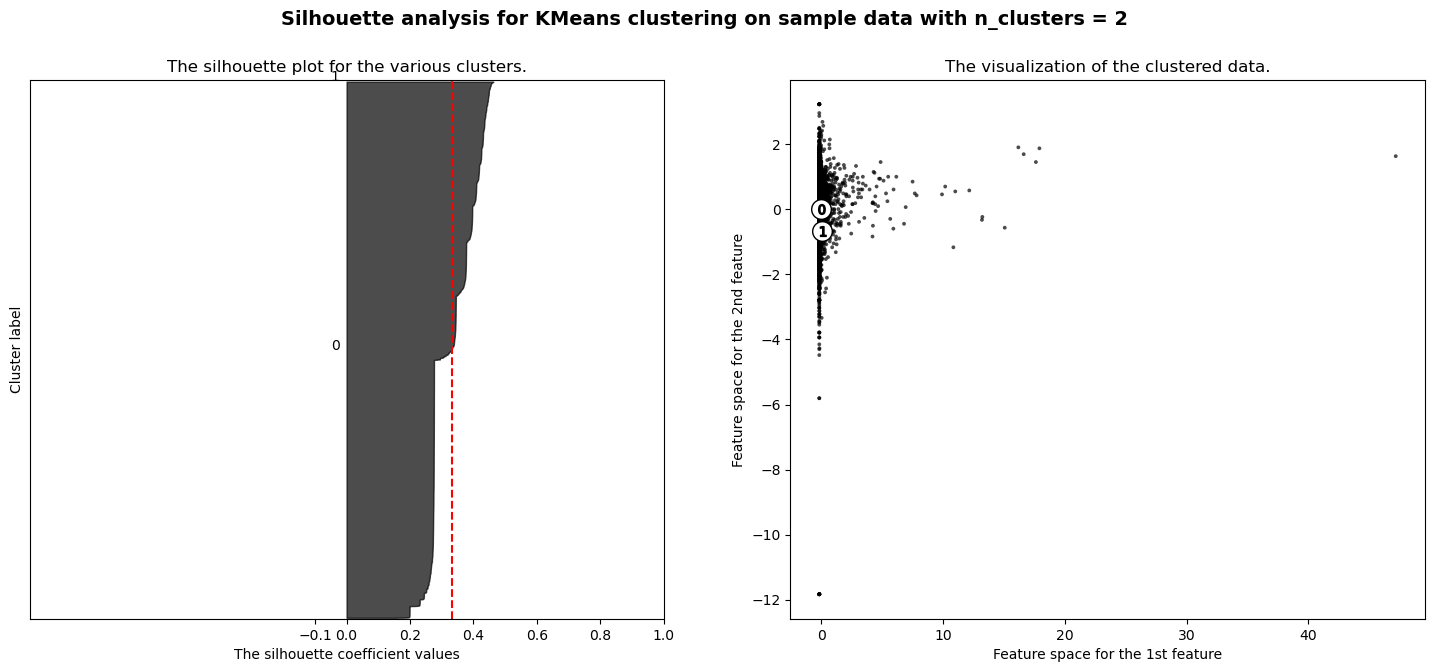

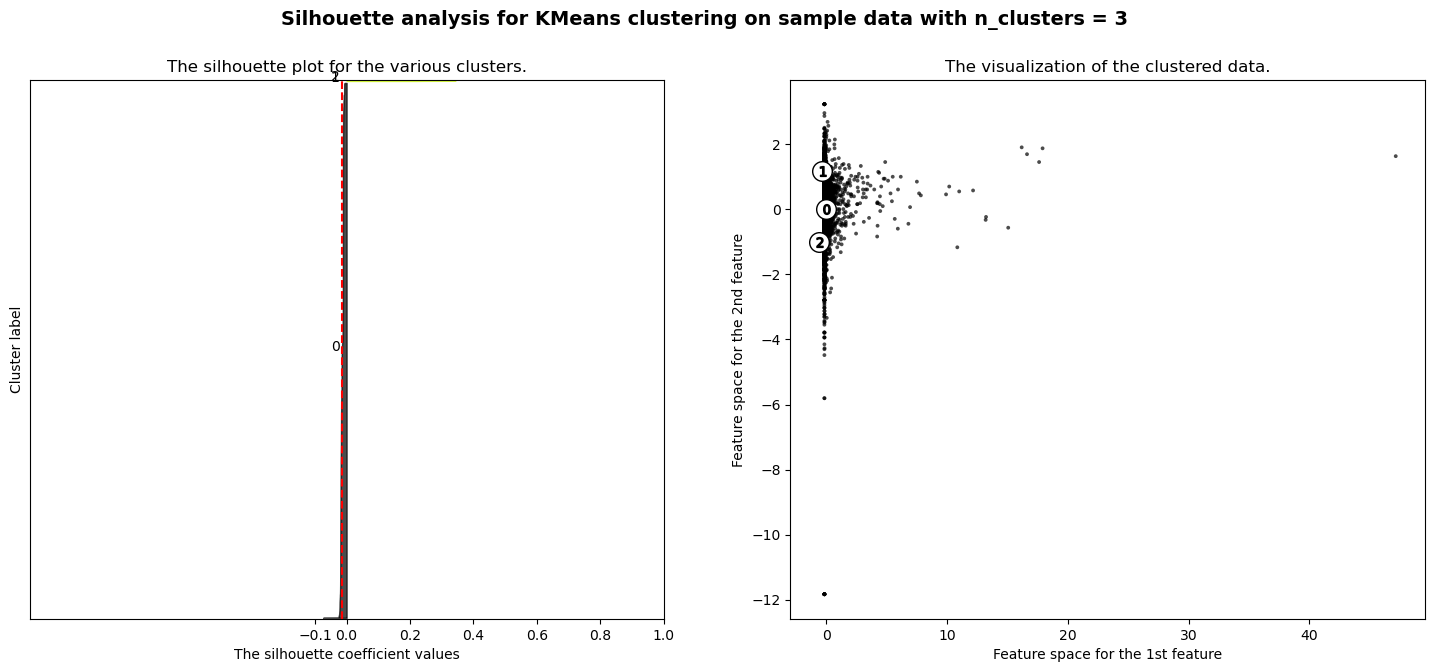

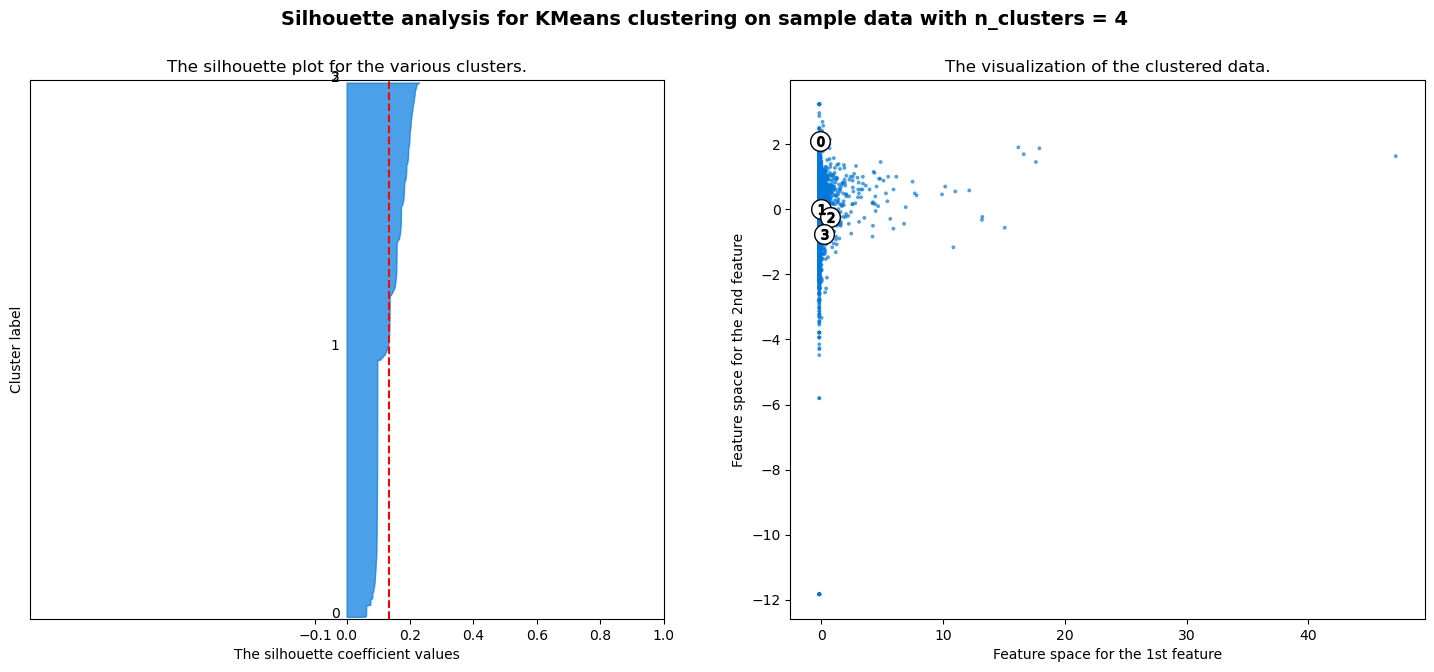

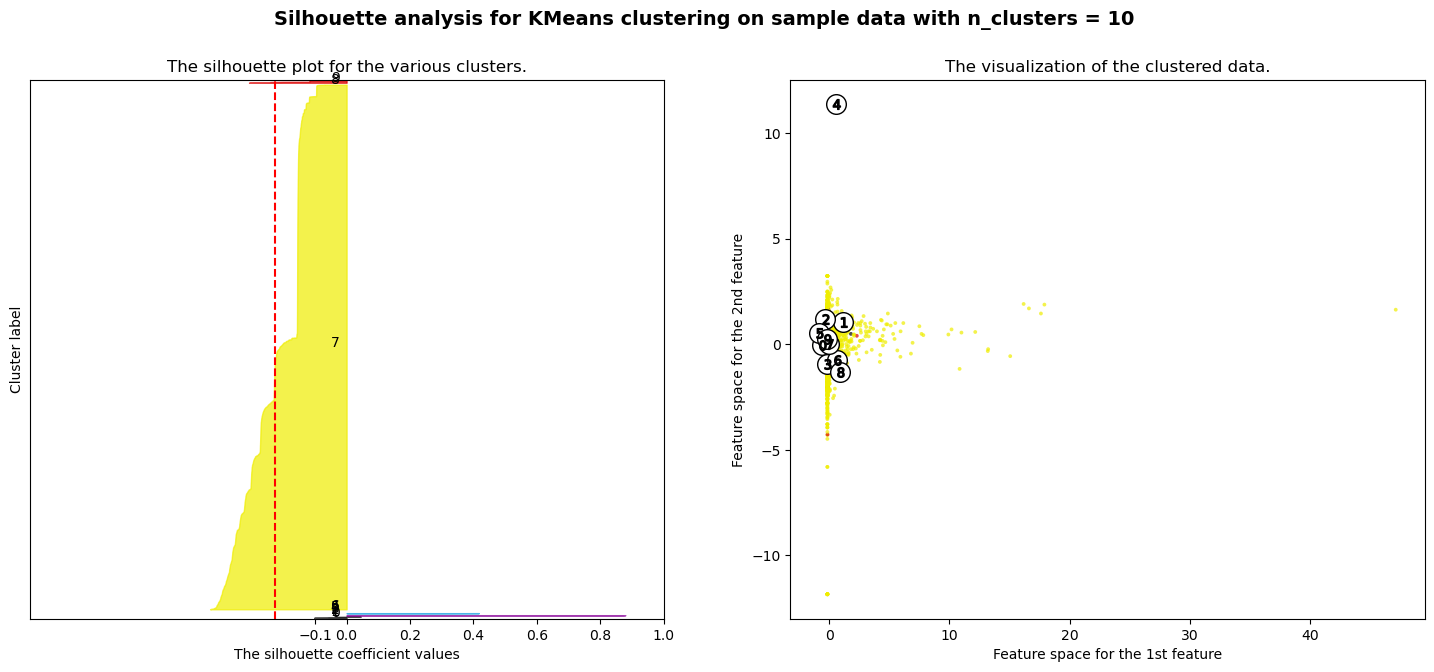

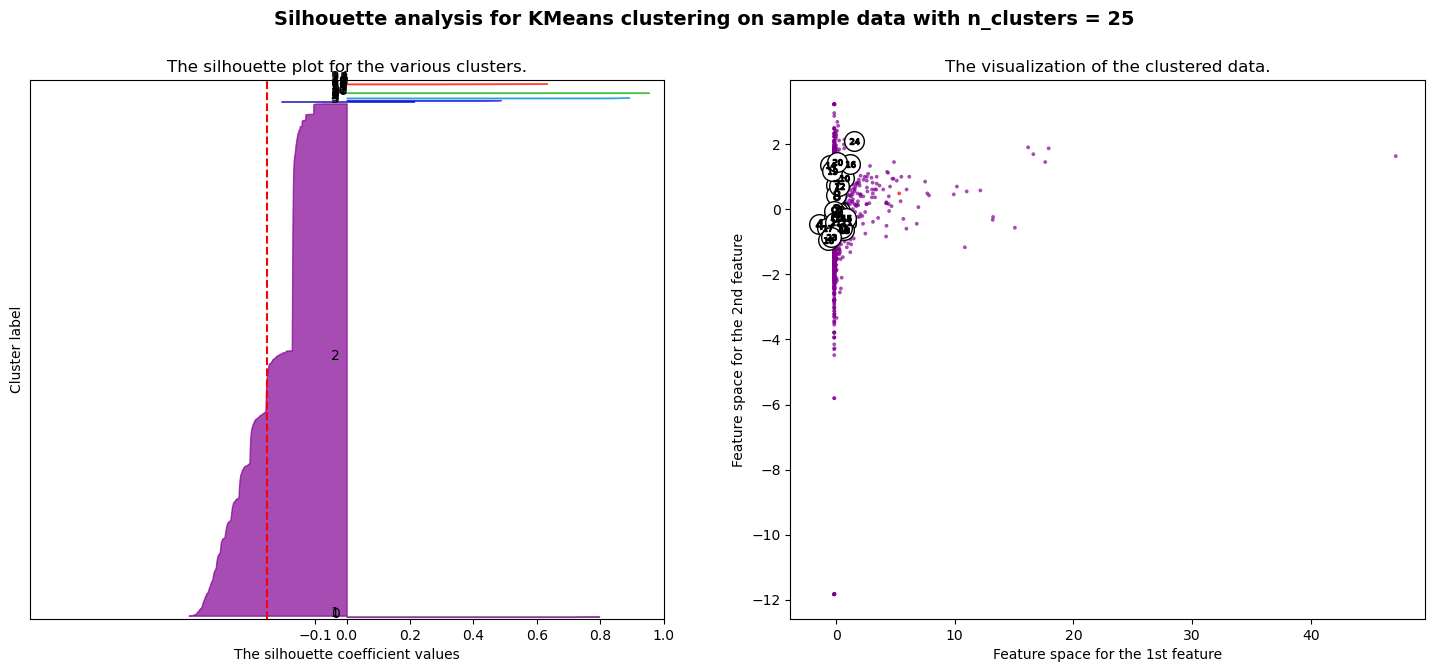

In [18]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dummies_df_scaled["ratings_count"], dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Using the silhouette method, the best silhouette score is obtained for K = 2, which is the model ran above. <br> As a way to optimise the model, we reduced the model to principal components. 

### PCA

In [19]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 2 principal components
transformed_df = pca.fit_transform(dummies_df_scaled)

In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00072798, 0.00071536])

In [22]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

,PCA1,PCA2
0,0.095338,0.147902
1,-0.063051,-0.486753
2,0.144027,0.080528
3,0.021369,0.006785
4,0.574600,-0.555108


In [23]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [24]:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [25]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [26]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

The elbow curve in the PCA transformed data seems to offer a clearer optimum value of K. Accordingly, we ran a clustering model on the pcs transformed data with 4 clusters. 

In [27]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

# Add book title so that we can check how books are being clustered
pca_predictions_df["title"] = dummies_df_scaled.index

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

In [29]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

34860.91006328601

In [30]:
# Save data to use in website
# merged_df = pca_predictions_df.merge(df[["authors", "thumbnail"]], on='title')
# merged_df.to_csv("../website/clustered_data_authors.csv")

Running the model in the PCA transformed data resulted in more clearly separated clusters. This is evidenced both by the cluster visualisation, and by the model evaluation, as the Calinski-Harabasz Index is much higher when clustering the PCA transformed data. However, 2 of the clusters are composed of only one book each. These books thus seem to be outliers, so in the next step we eliminate these books and re-run the PCA analysis. 

In [31]:
# Drop the 2 books that seem to be outliers
no_outliers_df = dummies_df_scaled.drop(["Hiero", "Aristophanes: The Acharnians"])

In [32]:
# Re-run PCA

# Create a PCA model instance
pca = PCA(n_components=2)

In [33]:
# Use the PCA model with `fit_transform` to reduce to 2 principal components
transformed_df = pca.fit_transform(no_outliers_df)

In [34]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00062007, 0.00060003])

In [35]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

,PCA1,PCA2
0,-0.232501,-0.354893
1,0.296505,-1.063684
2,-0.216742,0.597118
3,-0.180087,0.636291
4,1.567170,0.139720


In [36]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [37]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [38]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [39]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=5, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

# Add book title so that we can check how books are being clustered
pca_predictions_df["title"] = no_outliers_df.index

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

In [41]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

3236.2220247026385

In [42]:
# Save data to use in website
# merged_df = pca_predictions_df.merge(df[["authors", "thumbnail"]], on='title')
# merged_df.to_csv("../website/clustered_data_no_outliers.csv")